In [1]:
import pandas as pd
import pickle
import numpy as np
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.svm import SVC

In [2]:
user_tsne = pd.read_csv('User_tsne.csv')
user_data = pd.read_csv('User_data.csv')
champ_wr = pd.read_csv('../Web_crawling/Champion_WR.csv')

In [3]:
f = open('../Web_crawling/champion_id_and_name_list.pickle','rb')
champ_list = pickle.load(f)

In [4]:
user_data=user_data.iloc[:,1:]
user_data

,win,teamId,win rate,AFK rate
0,0.0,100.0,0.46796,0.005974
1,1.0,200.0,0.51354,0.004929
2,0.0,200.0,0.51058,0.005673
3,0.0,200.0,0.51818,0.005179
4,0.0,200.0,0.48538,0.005505
...,...,...,...,...
1604,1.0,200.0,0.49720,0.006233
1605,0.0,100.0,0.47784,0.006405
1606,0.0,200.0,0.49868,0.005889
1607,1.0,100.0,0.46538,0.006128


In [5]:
user_tsne=user_tsne.iloc[:,1:]
user_tsne

,0
0,30.070965
1,32.995872
2,19.749378
3,18.830124
4,-17.488695
...,...
1604,-24.038712
1605,-51.182830
1606,21.099178
1607,14.769392


In [6]:
user_data.corr()

,win,teamId,win rate,AFK rate
win,1.000000,-0.030588,0.024515,-0.029304
teamId,-0.030588,1.000000,0.464265,-0.034849
win rate,0.024515,0.464265,1.000000,-0.212040
AFK rate,-0.029304,-0.034849,-0.212040,1.000000


In [7]:
X=user_data.iloc[:,1:]
y=user_data.iloc[:,:1]

In [8]:
LR=LogisticRegression()

In [16]:
LR.fit(X,y)

C:\Users\DongwonLee\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [17]:
LR.score(X,y)

0.5152268489745183

In [9]:
tsne = TSNE(n_components=1,learning_rate=100)

In [10]:
tsne_results = tsne.fit_transform(X)

In [11]:
tsne_results

array([[  42.981937],
       [ -84.42114 ],
       [ -46.81703 ],
       ...,
       [  17.083336],
       [  50.32879 ],
       [-106.27721 ]], dtype=float32)

In [12]:
data_df = pd.DataFrame(tsne_results)

In [25]:
data_df.rename(columns={0:"match data"}, inplace=True)

In [20]:
data_df['user data']=user_tsne

In [21]:
data_df['win'] = y

In [26]:
data_df

,match data,user data,win
0,42.981937,30.070965,0.0
1,-84.421143,32.995872,1.0
2,-46.817032,19.749378,0.0
3,-93.935860,18.830124,0.0
4,-25.055786,-17.488695,0.0
...,...,...,...
1604,14.537148,-24.038712,1.0
1605,46.835957,-51.182830,0.0
1606,17.083336,21.099178,0.0
1607,50.328789,14.769392,1.0


In [37]:
svc=SVC()

In [38]:
svc.fit(data_df,y)

C:\Users\DongwonLee\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [39]:
svc.score(data_df,y)

0.6556867619639528

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data_df

,0,1
0,-38.742577,30.070965
1,84.066849,32.995872
2,72.847794,19.749378
3,93.751831,18.830124
4,8.393678,-17.488695
...,...,...
1604,29.969755,-24.038712
1605,-53.168396,-51.182830
1606,33.837967,21.099178
1607,-35.543728,14.769392


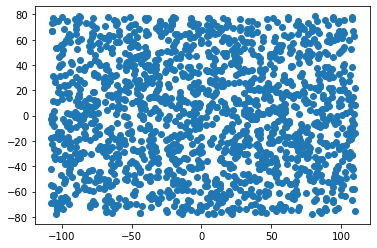

In [50]:
plt.scatter(data_df.iloc[:,0],data_df.iloc[:,1],label=y)

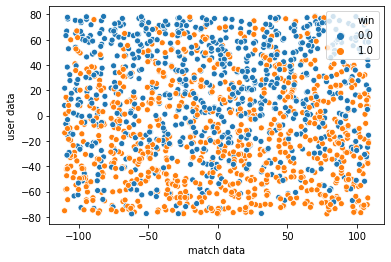

In [30]:
sns.scatterplot(x='match data',
                y='user data',
                hue="win",
               data=data_df)